In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./ipl_2022_dataset.csv')
df

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


# Pre-processing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [4]:
df.describe()

,Unnamed: 0,COST IN ₹ (CR.),Cost IN $ (000)
count,633.000000,237.000000,237.000000
mean,316.000000,3.695781,480.451477
std,182.875641,4.238092,550.951945
min,0.000000,0.200000,26.000000
25%,158.000000,0.400000,52.000000
50%,316.000000,1.900000,247.000000
75%,474.000000,6.500000,845.000000
max,632.000000,17.000000,2210.000000


In [5]:
df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [6]:
## Remove unnecessary column
df.drop(['Unnamed: 0','Cost IN $ (000)'],axis = 1,inplace = True)

In [7]:
df.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', '2021 Squad',
       'Team'],
      dtype='object')

In [8]:
## Drop Row which have Missing Value
df.dropna(inplace = True)

In [9]:
# Checking Is there any missing value present
df.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
2021 Squad         0
Team               0
dtype: int64

In [10]:
## Renaming Columns
df.rename(columns = {'Base Price':'Base_price','COST IN ₹ (CR.)':'Cost_in_r','2021 Squad':'2021_Squad'},inplace = True)

In [11]:
df.columns

Index(['Player', 'Base_price', 'TYPE', 'Cost_in_r', '2021_Squad', 'Team'], dtype='object')

In [12]:
df['Base_price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '1 Cr', '20 Lakh', '50 Lakh',
       '75 Lakh', 'Retained', '1.5 Cr', '30 Lakh'], dtype=object)

In [13]:
#### Converting Cr into lakh and removing Cr and lakh
def convert(val):
    if 'Cr' in val:
        val = val.replace('Cr','').strip()
        val = int(float(val) * 100)
    elif 'Lakh' in val:
        val = val.replace('Lakh','').strip()
        val = int(val)
    return val    
df['Base_price'] = df['Base_price'].apply(convert)

In [14]:
# Replacing Draft Pick and Retained into 0
df['Base_price'].replace('Draft Pick','0',inplace=True)
df['Base_price'].replace('Retained','0',inplace=True)

In [15]:
## Changing Datatype of Base Price Column
df['Base_price'] = df['Base_price'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 234
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      159 non-null    object 
 1   Base_price  159 non-null    int32  
 2   TYPE        159 non-null    object 
 3   Cost_in_r   159 non-null    float64
 4   2021_Squad  159 non-null    object 
 5   Team        159 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 8.1+ KB


# Visualization

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df

,Player,Base_price,TYPE,Cost_in_r,2021_Squad,Team
0,Rashid Khan,0,BOWLER,15.00,SRH,Gujarat Titans
1,Hardik Pandya,0,ALL-ROUNDER,15.00,MI,Gujarat Titans
2,Lockie Ferguson,200,BOWLER,10.00,KKR,Gujarat Titans
3,Rahul Tewatia,40,ALL-ROUNDER,9.00,RR,Gujarat Titans
4,Shubman Gill,0,BATTER,8.00,KKR,Gujarat Titans
...,...,...,...,...,...,...
228,Glenn Phillips,150,WICKETKEEPER,1.50,RR,Sunrisers Hyderabad
229,Shreyas Gopal,20,BOWLER,0.75,RR,Sunrisers Hyderabad
230,Vishnu Vinod,20,WICKETKEEPER,0.50,DC,Sunrisers Hyderabad
232,Priyam Garg,20,BATTER,0.20,SRH,Sunrisers Hyderabad


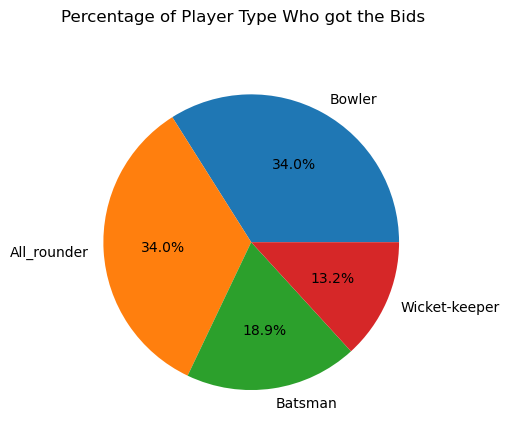

In [19]:
pct = df['TYPE'].value_counts(normalize=True)*100
label = ['Bowler','All_rounder','Batsman','Wicket-keeper']
plt.pie(pct,labels=label,autopct = '%.1f%%')
plt.suptitle('Percentage of Player Type Who got the Bids')
plt.show()

**Observation** : From the pie chart, It clear that 34% out of 234 players are Bowler and All rounder. and 18.9% , 13.2% out of the 234 are Batsman and Wicket-keeper respectively.

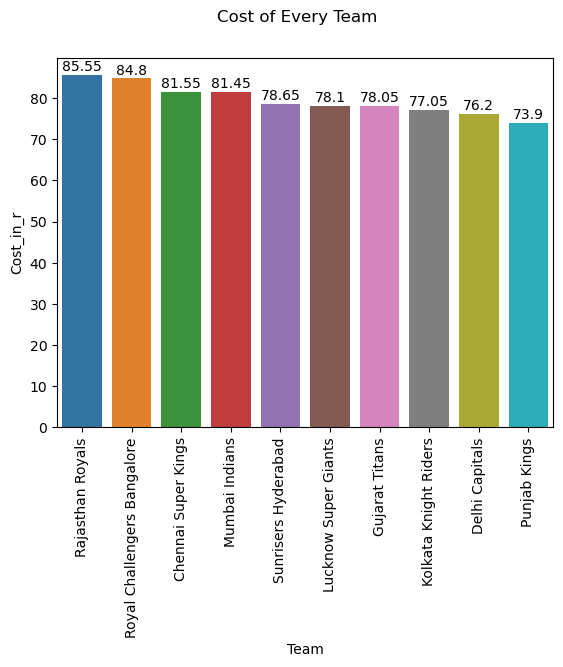

In [20]:
Data = df.groupby('Team')['Cost_in_r'].sum().sort_values(ascending = False).reset_index()
Data
sns.barplot(data = Data,x = 'Team',y = 'Cost_in_r')
for i in range(len(Data.Team)):
    plt.text(i,Data.Cost_in_r[i]+1,str(Data.Cost_in_r[i]),ha = 'center')
plt.xticks(rotation = 90)
plt.suptitle('Cost of Every Team')
plt.show()

**Observation** : In 2022, Rajsthan Royals Spent 85.55 Crore Rupees which is highest while punjab Spent 73.9 Cr which is lowest,

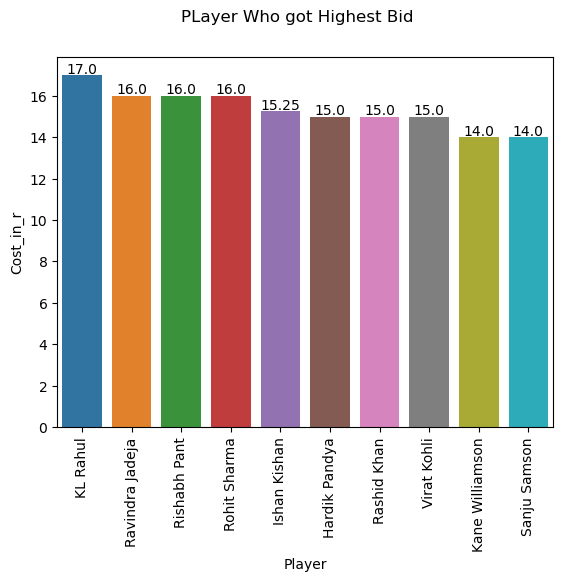

In [21]:
Data = df.sort_values(by = 'Cost_in_r',ascending = False).reset_index().head(10)
Data
sns.barplot(data = Data,x = 'Player',y = 'Cost_in_r')
for i in range(len(Data.Player)):
    plt.text(i,Data.Cost_in_r[i]+0.1,str(Data.Cost_in_r[i]),ha = 'center')
plt.xticks(rotation = 90)
plt.suptitle('PLayer Who got Highest Bid')
plt.show()

**Observation** :- Above Graph is Showing Top 10 Player of IPL 2022 Who got highest Bid

                          Team  Avg_cost
4         Lucknow Super Giants      5.58
5               Mumbai Indians      5.43
7             Rajasthan Royals      5.35
6                 Punjab Kings      5.28
2               Gujarat Titans      5.20
3        Kolkata Knight Riders      5.14
8  Royal Challengers Bangalore      4.99
0          Chennai Super Kings      4.80
9          Sunrisers Hyderabad      4.63
1               Delhi Capitals      4.01


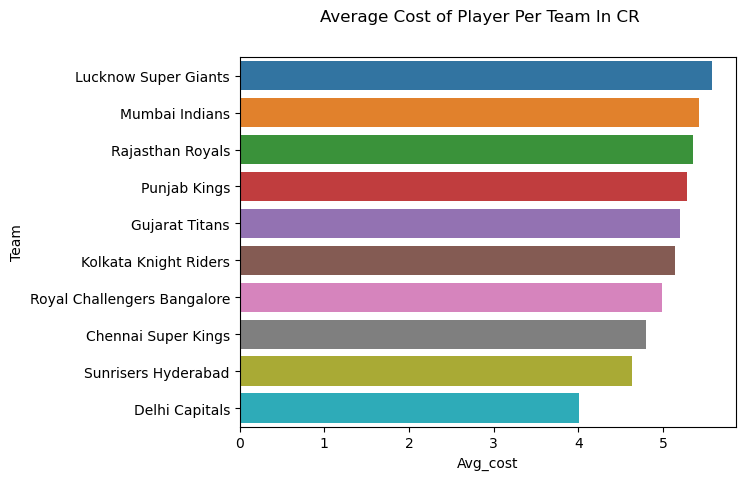

In [22]:
Data = df.groupby('Team')['Cost_in_r'].mean().reset_index().sort_values('Cost_in_r',ascending = False)
Data.columns = ['Team','Avg_cost']
Data
Data['Avg_cost'] = Data['Avg_cost'].apply(lambda x:round(x,2))
print(Data)

sns.barplot(data = Data,x = 'Avg_cost',y = 'Team')
plt.suptitle('Average Cost of Player Per Team In CR')
plt.show()

**Observation** : From the Graph we can say that LSG Average cost per player is 5.58 cr Which is Highest While delhi average cost per player is 4.01 which is lowest

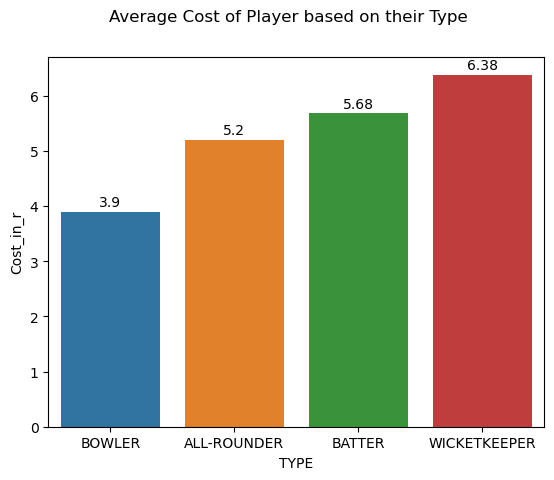

In [23]:
Data = df.groupby('TYPE').mean().reset_index().sort_values(by = 'Cost_in_r',ascending = True)
Data['Cost_in_r'] = Data['Cost_in_r'].apply(lambda x:round(x,2))
sns.barplot(data = Data,x = 'TYPE',y = 'Cost_in_r')
plt.suptitle('Average Cost of Player based on their Type')

for i,j in enumerate(Data.Cost_in_r):
    plt.text(i,j+0.1,str(j),ha = 'center')

plt.show()

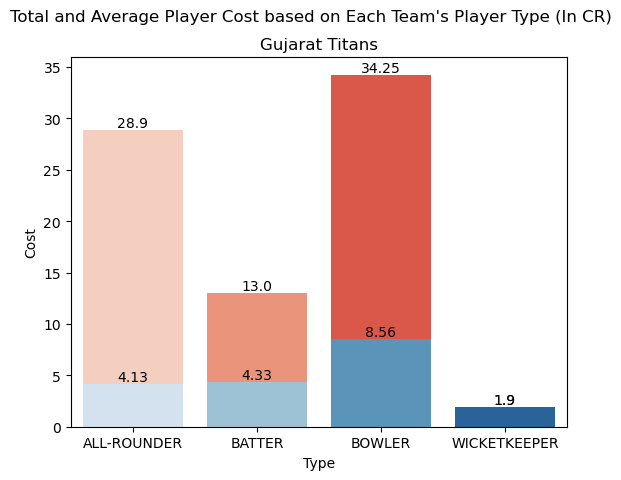

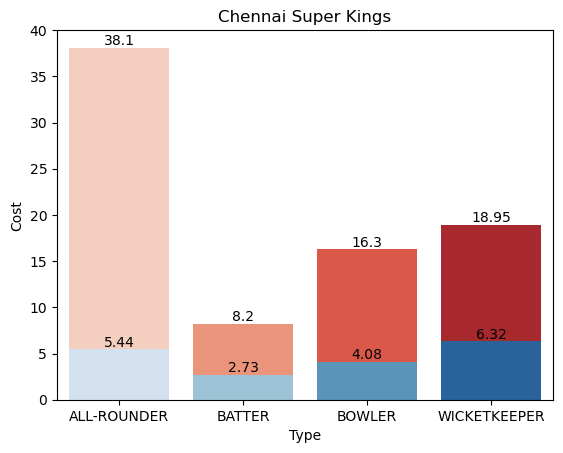

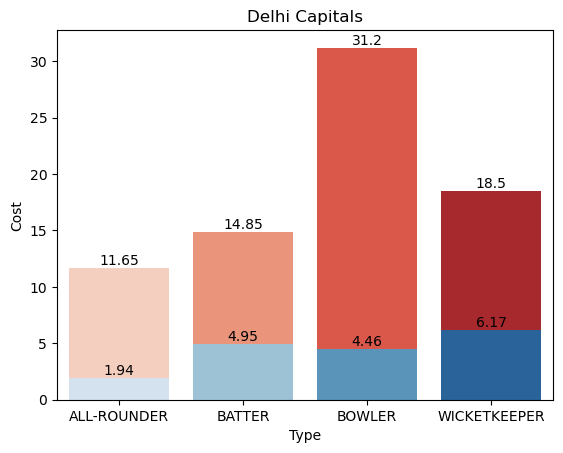

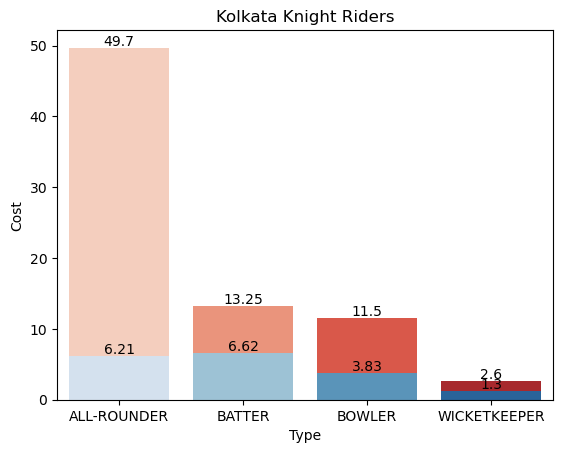

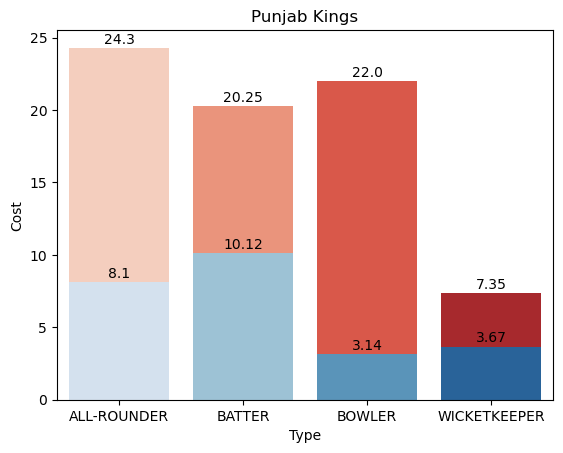

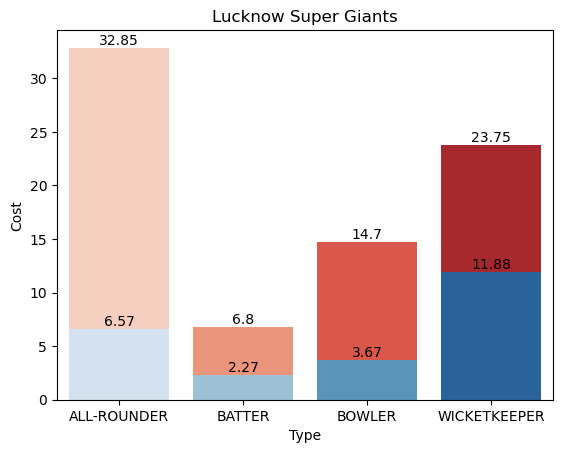

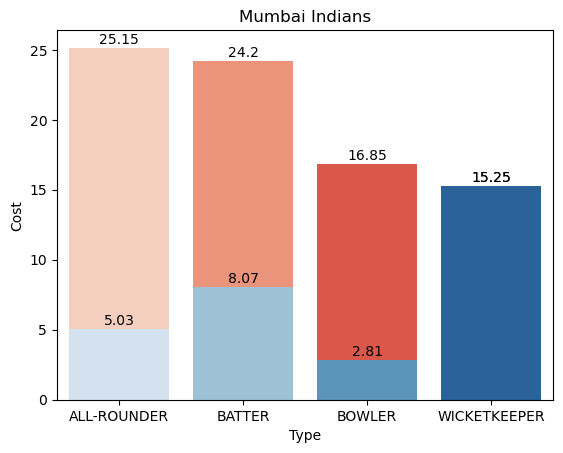

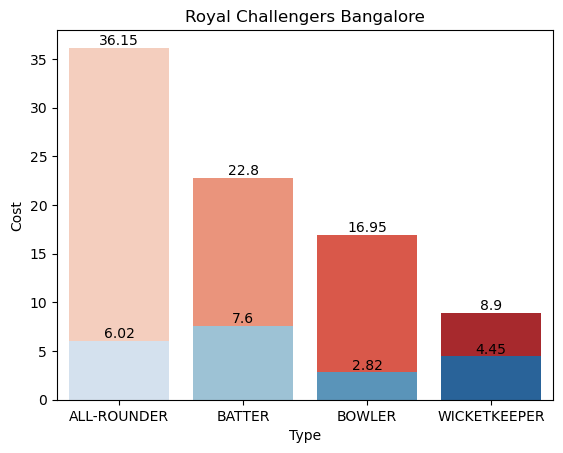

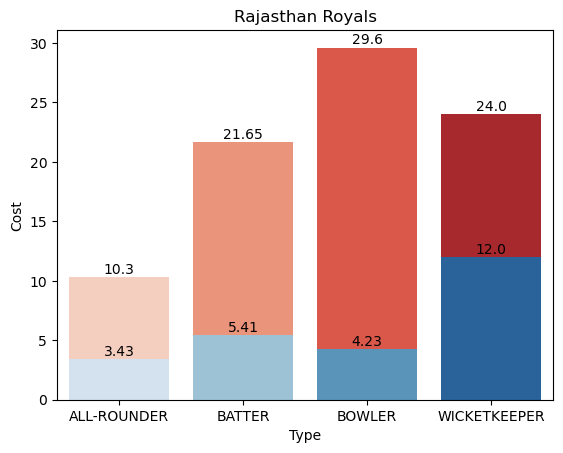

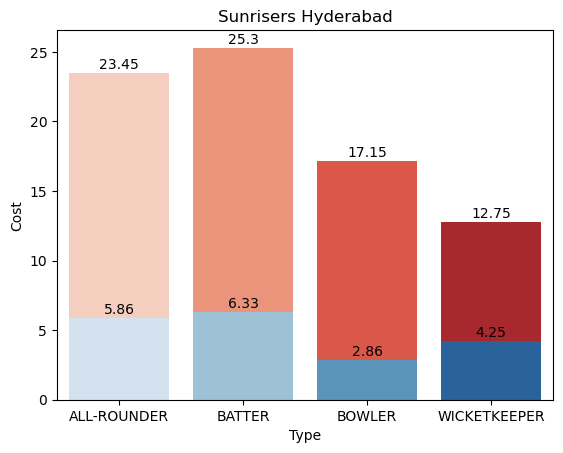

In [24]:
Teams = df['Team'].unique()
plt.suptitle("Total and Average Player Cost based on Each Team's Player Type (In CR)")
for i in Teams :
    ## Preparing Data for Grapg
    Data = df[df['Team'] == i].groupby('TYPE').sum().reset_index()
    Data['Avg_cost']= df[df['Team'] == i].groupby('TYPE').mean().reset_index()['Cost_in_r']
    Data['Avg_cost'] = Data['Avg_cost'].apply(lambda x:round(x,2))
    Data.rename(columns= {'Cost_in_r':'Sum_cost'},inplace=True)
    
    # Graph
    plt.title(i) 
    sns.barplot(x='TYPE', y='Sum_cost', data=Data, palette='Reds')
    for i,j in enumerate(Data.Sum_cost):
        plt.text(i,j+0.3,str(j),ha = 'center')
    sns.barplot(x='TYPE', y='Avg_cost', data=Data, palette='Blues')
    for i,j in enumerate(Data.Avg_cost):
        plt.text(i,j+0.3,str(j),ha = 'center')
    plt.xlabel('Type')
    plt.ylabel('Cost')
    plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 1000x200 with 0 Axes>

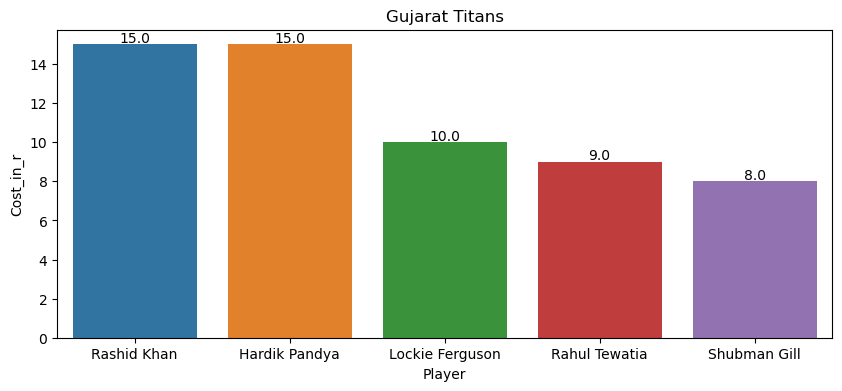

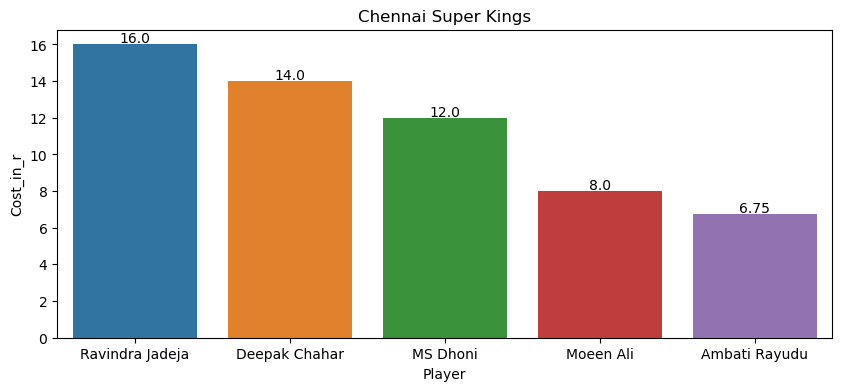

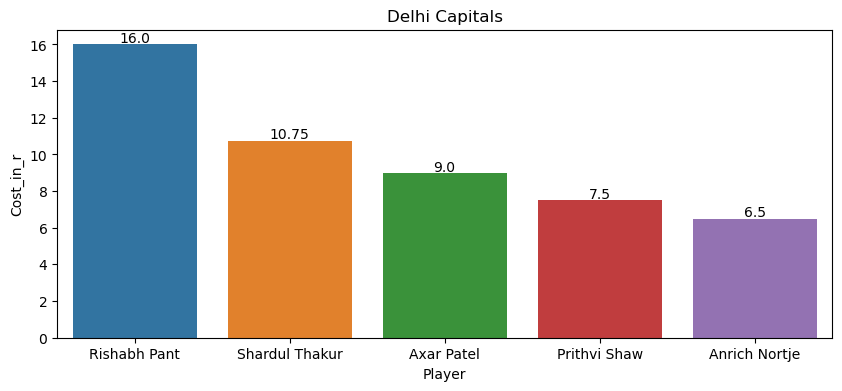

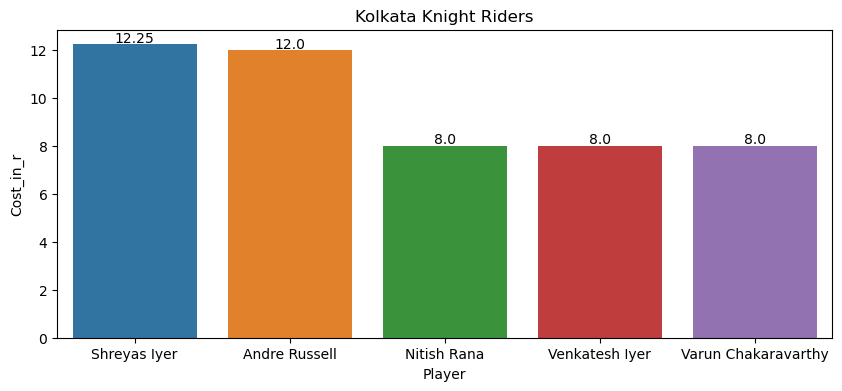

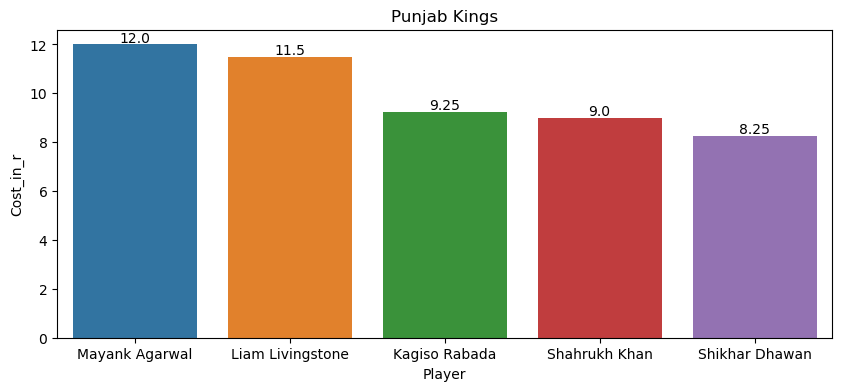

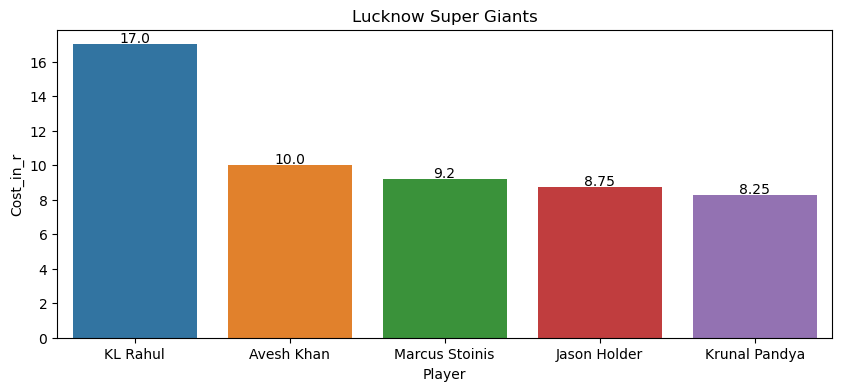

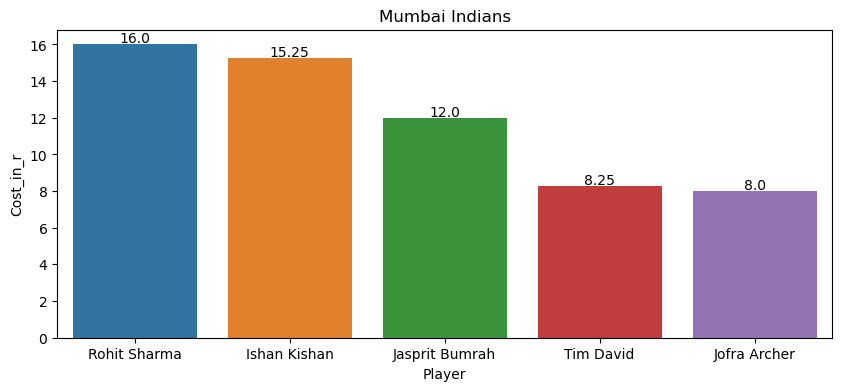

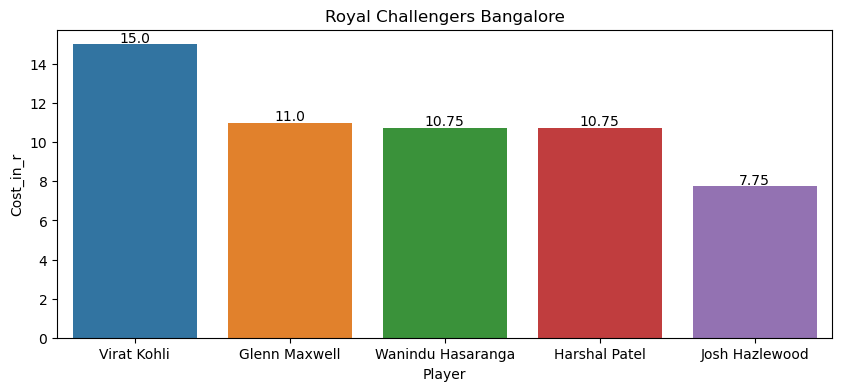

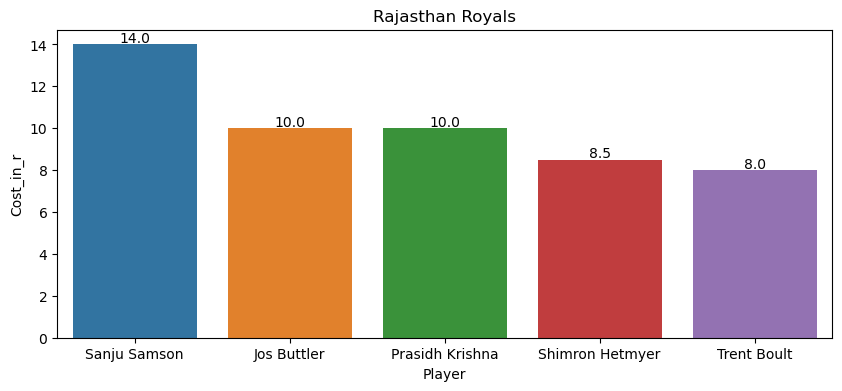

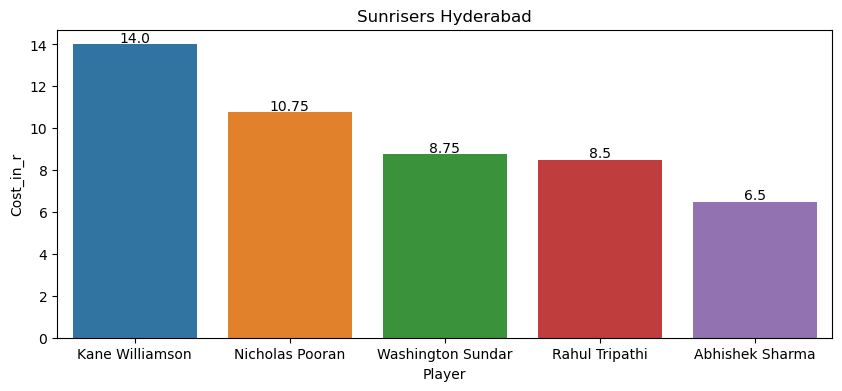

In [25]:
Teams = df.Team.unique()
plt.suptitle('TOP 5 Player of Each Team ')
plt.figure(figsize=(10,2))
for i in Teams:
    plt.figure(figsize=(10,4))
    Data = df[df['Team'] == i].sort_values(by = 'Cost_in_r',ascending = False).head()
    sns.barplot(data = Data,x = 'Player',y = 'Cost_in_r')
    for x,y in enumerate(Data.Cost_in_r):
        plt.text(x,y+0.1,str(y),ha = 'center')
    plt.title(i)
    plt.show()

In [26]:
Data = df.groupby(['Team','TYPE']).sum().reset_index()  

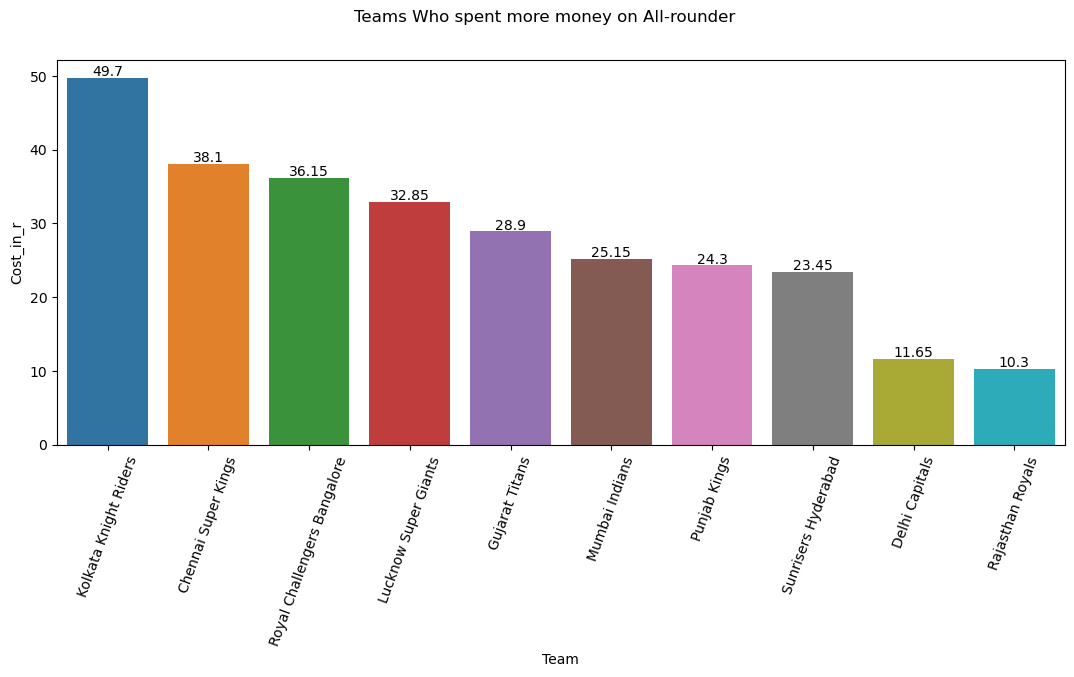

In [27]:
dt = Data[Data['TYPE'] == 'ALL-ROUNDER'].sort_values(by = 'Cost_in_r',ascending = False)  

plt.figure(figsize = (13,5))
sns.barplot(data = dt,x ='Team' ,y ='Cost_in_r')
plt.suptitle('Teams Who spent more money on All-rounder')
for i,j in enumerate(dt.Cost_in_r):
    plt.text(i,j+0.3,str(j),ha = 'center')
plt.xticks(rotation = 70)
plt.show()

**Insights** : KKR Spent 49.7 CR on All-rounder which is highest while RR spent 10.3 CR on All Rounder Which is lowest 

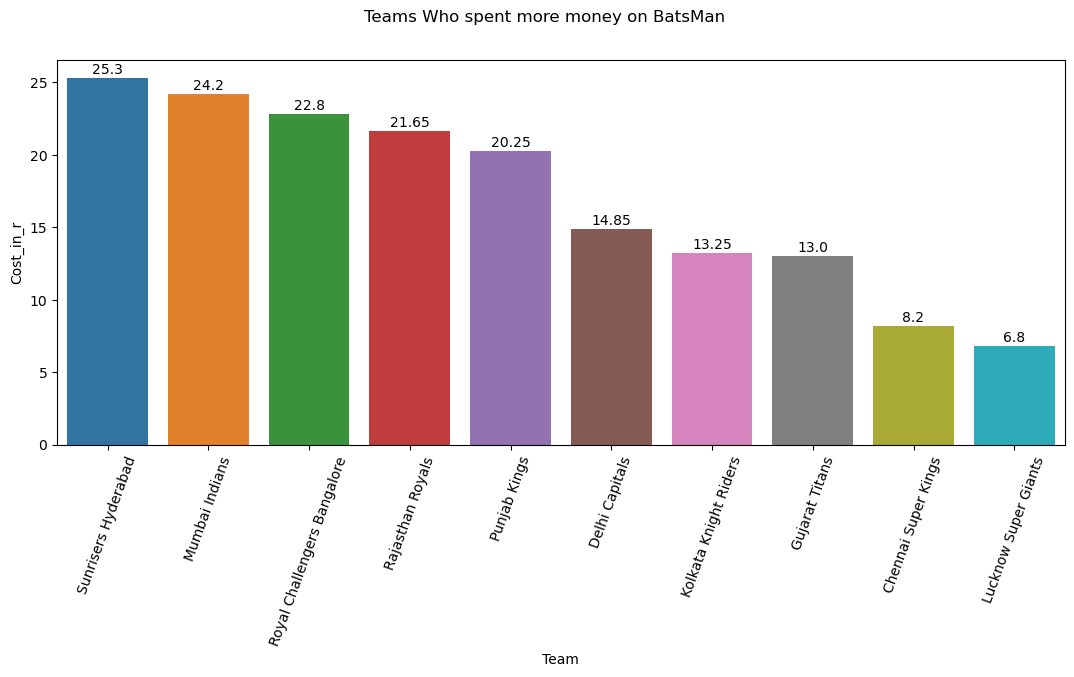

In [28]:
dt = Data[Data['TYPE'] == 'BATTER'].sort_values(by = 'Cost_in_r',ascending = False)  

plt.figure(figsize = (13,5))
sns.barplot(data = dt,x ='Team' ,y ='Cost_in_r')
plt.suptitle('Teams Who spent more money on BatsMan')
for i,j in enumerate(dt.Cost_in_r):
    plt.text(i,j+0.3,str(j),ha = 'center')
plt.xticks(rotation = 70)
plt.show()

**Insights** : SRH Spent 25.3 CR on Batsman which is highest while LSG spent 6.8 CR on Batsman Which is lowest 

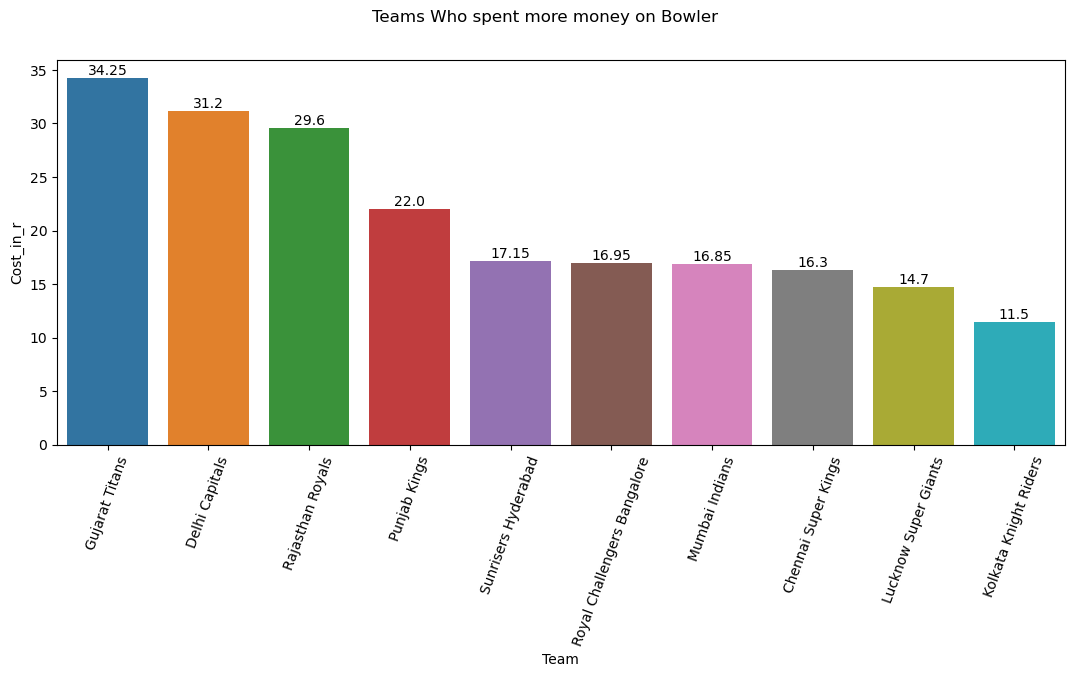

In [29]:
dt = Data[Data['TYPE'] == 'BOWLER'].sort_values(by = 'Cost_in_r',ascending = False)  

plt.figure(figsize = (13,5))
sns.barplot(data = dt,x ='Team' ,y ='Cost_in_r')
plt.suptitle('Teams Who spent more money on Bowler')
for i,j in enumerate(dt.Cost_in_r):
    plt.text(i,j+0.3,str(j),ha = 'center')
plt.xticks(rotation = 70)
plt.show()

**Insights** : GT Spent 34.25 CR on Bowler which is highest while KKR spent 11.5 CR on Bowler Which is lowestmm 

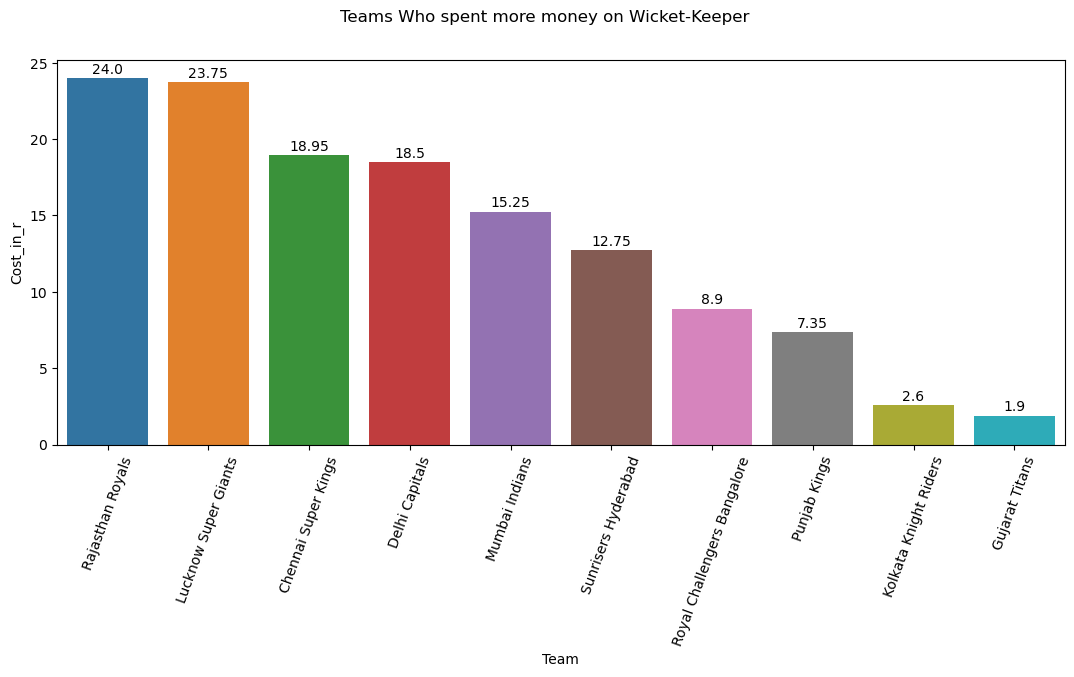

In [30]:
dt = Data[Data['TYPE'] == 'WICKETKEEPER'].sort_values(by = 'Cost_in_r',ascending = False)  

plt.figure(figsize = (13,5))
sns.barplot(data = dt,x ='Team' ,y ='Cost_in_r')
plt.suptitle('Teams Who spent more money on Wicket-Keeper')
for i,j in enumerate(dt.Cost_in_r):
    plt.text(i,j+0.3,str(j),ha = 'center')
plt.xticks(rotation = 70)
plt.show()

**Insights** : RR Spent 24.0 CR on Wicket-keeper which is highest while GT spent 1.9 CR on Wicket-keeper Which is lowest 

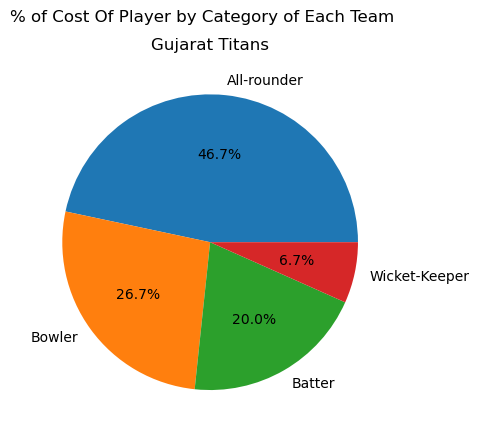

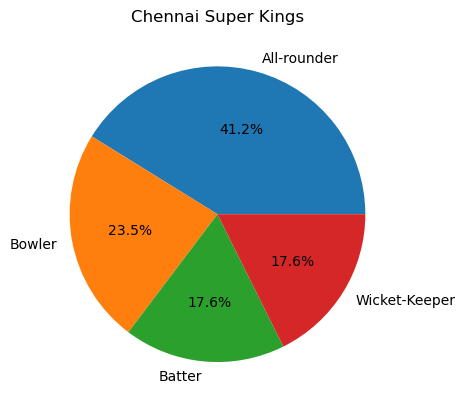

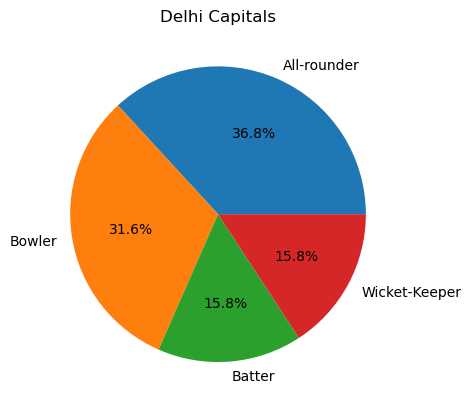

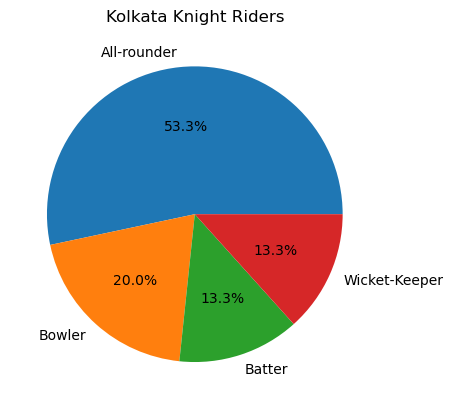

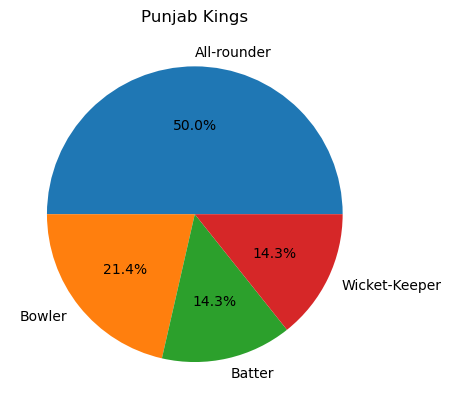

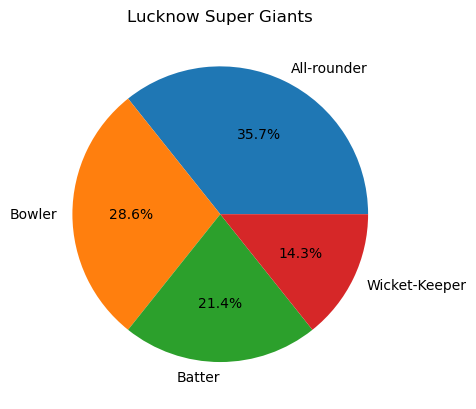

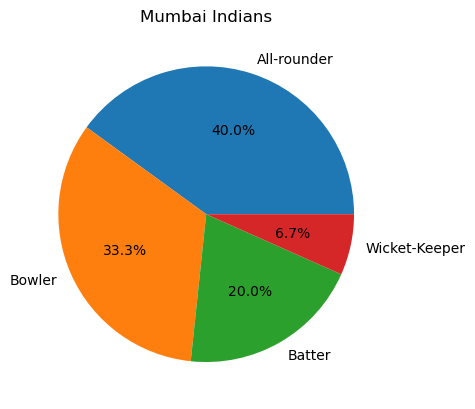

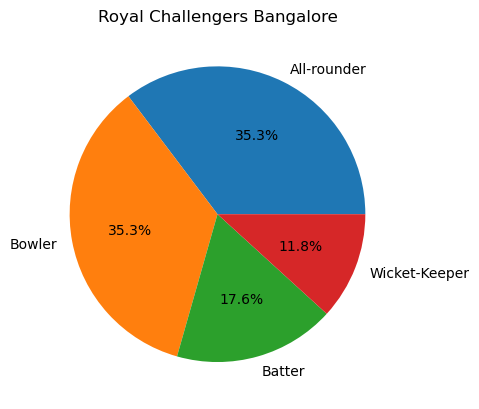

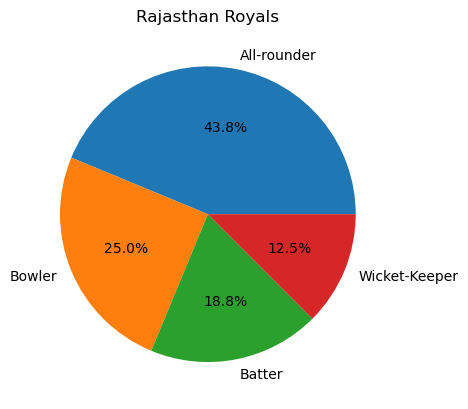

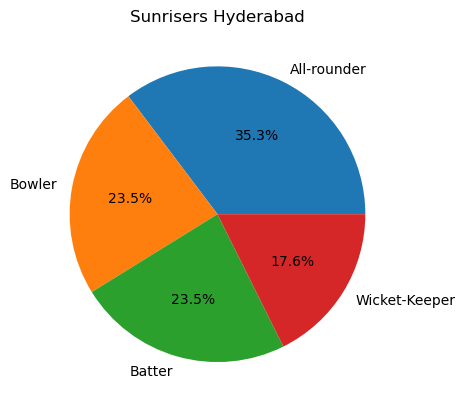

In [31]:
Teams = df.Team.unique()
label = ['All-rounder','Bowler','Batter','Wicket-Keeper']
plt.suptitle('% of Cost Of Player by Category of Each Team')
for i in Teams:
    pct = df[df['Team'] == i]['TYPE'].value_counts(normalize = True)*100
    plt.title(i)
    plt.pie(pct,labels=label,autopct = '%.1f%%')
    plt.show()